<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-testing-for-two-variables" data-toc-modified-id="AB-testing-for-two-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB testing for two variables</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Generator" data-toc-modified-id="Data-Generator-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Generator</a></span></li><li><span><a href="#P-value-calculator" data-toc-modified-id="P-value-calculator-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>P value calculator</a></span></li><li><span><a href="#Experiment-runner" data-toc-modified-id="Experiment-runner-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Experiment runner</a></span></li></ul></li><li><span><a href="#AB-testing-for-more-than-two-variables" data-toc-modified-id="AB-testing-for-more-than-two-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AB testing for more than two variables</a></span></li></ul></div>

## AB testing for two variables

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

### Data Generator

In [3]:
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0      
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2

### P value calculator

In [4]:
def get_p_value(T):
    det = T[0,0]*T[1,1] - T[1,0]*T[0,1]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() /  T[:,1].sum()
    p = 1 - chi2.cdf(x=c2, df=1)
    return p

### Experiment runner

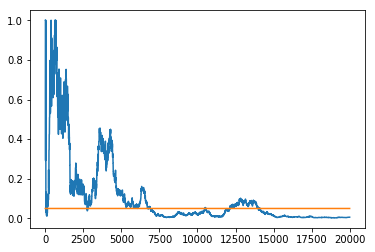

In [20]:
def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2,2)).astype(np.float32)
    for i in range(N):
        c1,c2= data.next()
        T[0,c1]+=1
        T[1, c2]+=1
        if i<10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()
    
run_experiment(0.1, 0.11, 20000)

## AB testing for more than two variables

**Possibe Ways**
* Pairwise testing
* One-vs-All(rest)

Post Hoc Testing
